# Scratch Artificial Neural Network

In [1]:
%load_ext autoreload
%autoreload 2

In [15]:
import sys
sys.dont_write_bytecode = True

# Import libraries
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Import custom modules
from ArtificialNeuralNetwork import ArtificialNeuralNetwork
from Layer import Layer, OutputLayer, InputLayer
from Function import ActivationFunction, LossFunction
from enums import InitializerType, RegularizationType

# Pipeline for testing MNIST dataset

In [3]:
input_size = 784
hidden_layers = 2
hidden_size = 128
output_size = 10
learning_rate = 0.01
param_1 = 0
param_2 = 0
batch_size = 64

In [4]:
# Load MNIST dataset using fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X / 255.0
y = y.astype(int)


# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,
)

In [22]:
ann = ArtificialNeuralNetwork(
        123,
        InputLayer(input_size=input_size),
        Layer(
            weight_init=InitializerType.HE,
            bias_init=InitializerType.ZERO,
            input_size=input_size,
            num_neurons=128,
            param_1=param_1,
            param_2=param_2,
            activation=ActivationFunction.relu,
            regularizer=RegularizationType.L2,
            alpha=0.45,
            layer_name=f"Hidden Layer 0",
        ),
        *[Layer(
            weight_init=InitializerType.HE,
            bias_init=InitializerType.ZERO,
            input_size=128,
            num_neurons=128,
            param_1=param_1,
            param_2=param_2,
            activation=ActivationFunction.relu,
            regularizer=RegularizationType.L2,
            alpha=0.45,
            layer_name=f"Hidden Layer {_}",
        ) for _ in range(hidden_layers - 1)],
        OutputLayer(
            weight_init=InitializerType.HE,
            bias_init=InitializerType.ZERO,
            input_size=128,
            num_neurons=output_size,
            param_1=param_1,
            param_2=param_2,
            activation=ActivationFunction.softmax,
            regularizer=RegularizationType.L2,
            loss_funct=LossFunction.categorical_cross_entropy,
            layer_name="Output Layer"
        )
    )

In [23]:
ann.train(
    x=X_train,
    y=y_train,
    loss_function=LossFunction.categorical_cross_entropy,
    lr=learning_rate,
    epochs=50,
    batch_size=batch_size,
    verbose=True,
    validation_data=(X_test, y_test),
)

Training: 100%|██████████| 50/50 [00:31<00:00,  1.60it/s, Loss: 3.0221, Val Loss: 3.0069] 

Total training time: 29.61s


([14.271013727192686,
  13.457879741085218,
  12.289397834023807,
  10.893707688847577,
  9.539154696805754,
  8.402777233802116,
  7.508017112600149,
  6.820844396294647,
  6.283807315592826,
  5.858227764303671,
  5.505362859946114,
  5.223636801044512,
  4.9823501199831846,
  4.78563946071539,
  4.603659493859923,
  4.457127227865101,
  4.324425496951371,
  4.210620616025416,
  4.108504747159051,
  4.012240248172466,
  3.9304750826745467,
  3.8590991773334964,
  3.7892115606999295,
  3.729156504472447,
  3.6752026152666297,
  3.619053808136341,
  3.5722378896646294,
  3.5304864760598047,
  3.4934548787817423,
  3.451952698930864,
  3.4145058383074427,
  3.381964235171846,
  3.3504289762499995,
  3.3208237394131386,
  3.2958043758282396,
  3.2732236650269924,
  3.242986240801671,
  3.219693122636524,
  3.2005156183259658,
  3.177037903822652,
  3.1627521011263724,
  3.13983363318172,
  3.1216005034405803,
  3.109120236154759,
  3.090753224868757,
  3.0747934819987526,
  3.05930259593

In [24]:
from sklearn.metrics import f1_score

y_pred = ann.predict(X_test)
print(f"F1 Score: {f1_score(y_test, y_pred, average='macro')}")

F1 Score: 0.9119588432912472


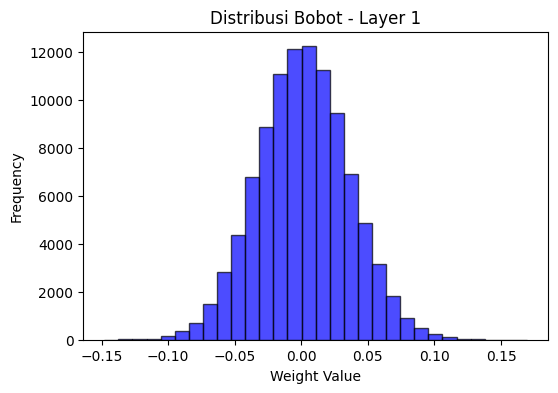

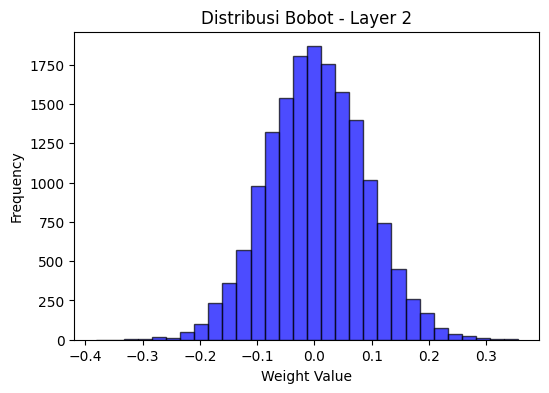

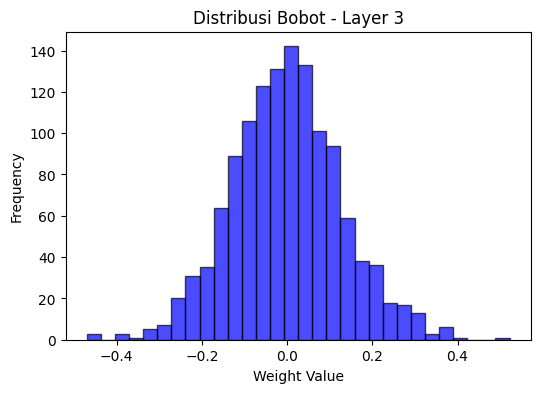

In [8]:
ann.visualize_weight_distribution((1,2,3))

In [9]:
ann.save("ann_model.pkl")

Model saved to models/ann_model.pkl


In [10]:
new_model = ArtificialNeuralNetwork()

In [11]:
new_model.load("ann_model.pkl")

Model loaded from models/ann_model.pkl


In [12]:
new_model.evaluate(X_test, y_test)

np.float64(0.9238571428571428)

In [25]:
# Compare with MLP

from sklearn.neural_network import MLPClassifier

# Comparison with scikit-learn MLP (using ReLU instead of PReLU)
model = MLPClassifier(
    hidden_layer_sizes=(128, 128),
    activation='relu',
    solver='sgd',
    max_iter=50,
    batch_size=batch_size,
    random_state=123,
    verbose=True,
    learning_rate_init=0.01,
    learning_rate='constant',
    tol=0.0
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("F1 Score: ", f1_score(y_test, y_pred, average='macro'))

Iteration 1, loss = 0.48440249
Iteration 2, loss = 0.21901139
Iteration 3, loss = 0.16486152
Iteration 4, loss = 0.13181580
Iteration 5, loss = 0.11065365
Iteration 6, loss = 0.09405129
Iteration 7, loss = 0.08190933
Iteration 8, loss = 0.07222130
Iteration 9, loss = 0.06426376
Iteration 10, loss = 0.05844841
Iteration 11, loss = 0.05193848
Iteration 12, loss = 0.04684660
Iteration 13, loss = 0.04230466
Iteration 14, loss = 0.03825414
Iteration 15, loss = 0.03470303
Iteration 16, loss = 0.03151143
Iteration 17, loss = 0.02790935
Iteration 18, loss = 0.02604815
Iteration 19, loss = 0.02311515
Iteration 20, loss = 0.02142717
Iteration 21, loss = 0.01896225
Iteration 22, loss = 0.01744021
Iteration 23, loss = 0.01611057
Iteration 24, loss = 0.01449083
Iteration 25, loss = 0.01339546
Iteration 26, loss = 0.01217621
Iteration 27, loss = 0.01096214
Iteration 28, loss = 0.01011963
Iteration 29, loss = 0.00906160
Iteration 30, loss = 0.00865255
Iteration 31, loss = 0.00756095
Iteration 32, los

/Users/mfauzanazhim/Github/Tubess-1-IF3270-PembelajaranMesin/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
